In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, LearningCurveDisplay
import matplotlib.pyplot as plt

Cargar los datos

In [126]:
df = pd.read_csv('output.csv')
y = df['y']
X = df.drop('y', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 234, stratify = y)

Crear los modelos con los parametros previamente encontrados

In [132]:
logReg = LogisticRegression(C = 0.0001, penalty = 'l1', solver = 'liblinear')
ranForest = RandomForestClassifier(max_depth = 2, n_estimators = 200)

Entrenamos los modelos

In [128]:
logReg.fit(X_train, y_train)
ranForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200)

## Compararacion de los modelos

Antes de hacer estas comparacion, cabe recalcar que por el objetivo y el contexto de los datos, el lo que debemos de hacer es minimizar los Falsos Negativos, esto debido a que sera para un banco peor el perder posibles ganancias por no haber llamado a una persona, que tener un costo marginal mas bajo de contactar a una persona que el modelo incorrectamente predijo que si iba a contratar (esto porque existe la posibilidad, por mas remota de que sea, que efectivamente lo haga), es decir, es mejor pecar por intentar contactar de mas, que perder por no contactar.

Es decir, para nosotros la metrica mas importante es el `recall`.

Ademas, no vamos a usar la curva ROC devido a que como se vio en nuestra exploracion de datos, el dataset no esta balanceado, esto debido a que a duras penas hay personas que abrieron un CDT en comparacion con las que no lo hicieron.

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, cohen_kappa_score

In [129]:
predLogReg = logReg.predict(X_test)
predLogReg

array([False, False, False, ..., False, False, False])

In [130]:
predRanForest = ranForest.predict(X_test)
predRanForest

array([False, False, False, ..., False, False, False])

### Kohen-Cappa Test

Este test va a servir para determinar que tan cercanas son o que tanto difieren las predicciones de los modelos

In [131]:
cohen_kappa_score(predLogReg, predRanForest)

c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\metrics\_classification.py:708: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


nan

Esto que se esta viendo con el Kohen-Cappa test es un gran problema, esto esta dando indicaciones de que los modelos solo estan prediciendo `no` a todo

### Reporte de clasificacion

In [123]:
print(classification_report(y_test, predLogReg))

              precision    recall  f1-score   support

       False       0.88      1.00      0.94     15969
        True       0.00      0.00      0.00      2116

    accuracy                           0.88     18085
   macro avg       0.44      0.50      0.47     18085
weighted avg       0.78      0.88      0.83     18085



c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [124]:
print(classification_report(y_test, predRanForest))

              precision    recall  f1-score   support

       False       0.88      1.00      0.94     15969
        True       0.00      0.00      0.00      2116

    accuracy                           0.88     18085
   macro avg       0.44      0.50      0.47     18085
weighted avg       0.78      0.88      0.83     18085



c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Estos reportes de clasificacion estan demostrando lo que se temia, los modelos no estan prediciendo como deberian, solamente estan diciendo que `no`.

Esto se puede deber a que como previamente fue mencionado en los diagnosticos de los modelos anteriores, la calidad de los datos no es suficiente.

Se va a mostrar de igual manera las matrices de confucion, pero ya se puede concluir que los modelos no son usables.


#### Matrices de confucion

##### Logistic Regresion

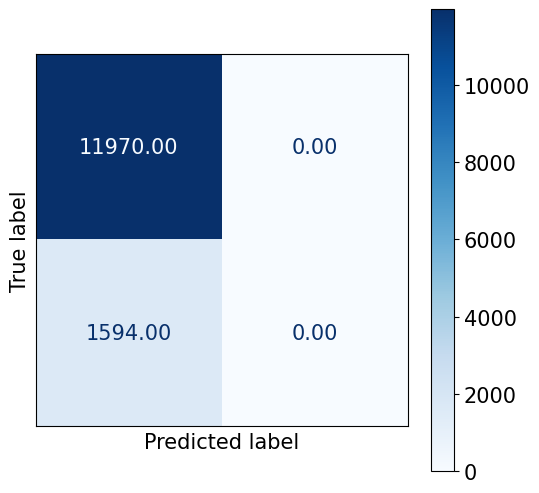

In [133]:
cm = confusion_matrix(y_test, predLogReg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

font={'size':'15'}
plt.rc('font',**font)
plt.rcParams['figure.figsize']=[6,6]
disp.plot(cmap='Blues',values_format='0.2f')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

##### Random Forest

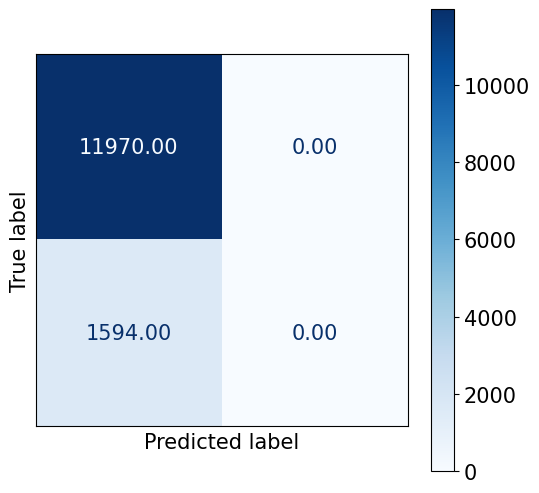

In [135]:
cm = confusion_matrix(y_test, predRanForest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

font={'size':'15'}
plt.rc('font',**font)
plt.rcParams['figure.figsize']=[6,6]
disp.plot(cmap='Blues',values_format='0.2f')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

### Conclusion

Realmente ninguno de los dos modelos estan funcionando bien. Solo estan diciendo que `no` a todo, lo cual no solo es erroneo, si no que hace que el nivel de Falsos Negativos sea muy alto.

Lo que se deberia de hacer es mejorar la calidad de los datos, por medio de recoger datos los cuales sean mas especificos, y si que en verdad puedan representar a diferentes poblaciones con diferentes caracteristicas, y de esa manera ahi si se podria hacer un modelo realmente util.

Pero tal como estan nuestros datos, no se puede realizar un modelo de prediccion con el cual el banco, sin ningun contacto previo con el posible cliente, pueda predecir de manera acertada (o al menos aceptable) si dicho posible cliente va a abrir un CDT o no